In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-27 15:17:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   120KB/s    in 0.6s    

2020-05-27 15:17:19 (120 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
dataFrame = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dataFrame.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


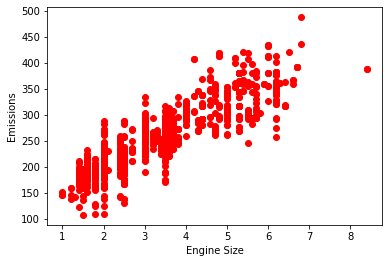

In [5]:
plt.scatter(dataFrame.ENGINESIZE, dataFrame.CO2EMISSIONS, color = 'red')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [11]:
mask = np.random.rand(len(df)) < 0.8
train = dataFrame[mask]
test = dataFrame[~mask]

#### Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

trainX = np.asanyarray(train[['ENGINESIZE']])
trainY = np.asanyarray(train[['CO2EMISSIONS']])

testX = np.asanyarray(test[['ENGINESIZE']])
testY = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
trainXpoly = poly.fit_transform(trainX)
trainXpoly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

Polynomial regression converted to multiple linear regression

In [13]:
clf = linear_model.LinearRegression()
trainY = clf.fit(trainXpoly, trainY)

print('Coefficients : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coefficients :  [[ 0.         51.93705332 -1.74841269]]
Intercept :  [105.72086323]


Text(0, 0.5, 'Emissions')

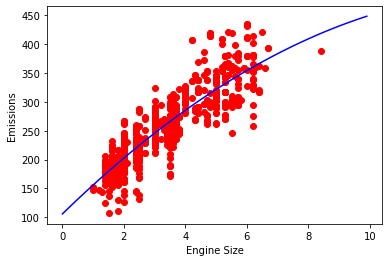

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'red')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * xx + clf.coef_[0][2] * np.power (xx, 2)
plt.plot(xx, yy, '-b')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [16]:
from sklearn.metrics import r2_score

testXpoly = poly.fit_transform(testX)
yHat = clf.predict(testXpoly)

print('Mean absolute error : %.2f' % np.mean(np.absolute(yHat - testY)))
print('Residual sum of squaares (MSE) : %.2f' % np.mean((yHat - testY) ** 2))
print('R2 Score : %.2f' % r2_score(yHat, testY))

Mean absolute error : 24.58
Residual sum of squaares (MSE) : 1020.29
R2 Score : 0.69
